# CMPS 3160 Final Project  
## Modeling player stats and salaries by season for NHL, NBA, and NFL
### By: Ryan Stevens, Alex Olteanu  
#### Github.io: https://stevensryanw.github.io
#### GitHub: https://github.com/stevensryanw/stevensryanw.github.io

### Introduction  

In this project we will be creating our own datasets through merging datasets from multiple online sources. The datasets we will be using are from the National Hockey League (NHL), National Basketball Association (NBA), and the National Football League (NFL). For each league we have created a dataset that contains the statistics of each player in the league, and a dataset that contains the salaries of each player in the league. We will be using these datasets to create a model that will predict the salary of a player based on their statistics. In adition to this, we will be using the datasets to create a model that will predict the salary of a player based on the statistics of the players on their team. Another question we will be answering is which league has the highest average salary. Additionally, we will be answering the question of which league has the highest average salary for a player based on their position. 

We would also like to create multiple heat maps and graphs showing the correlation between salary and location. I would like to find if any location has higher salaries in any of the leagues. I would also like to find if any location has higher salaries for a specific position in any of the leagues. Moreover, since our data sets are currently so large this poses a very interesting question of what is the best way to tackle all of this information. Given the dozens of measures available to describe an athlete statistically, this means that there is a fairly large combination of different metrics and their correlation. We believe that we will first have to investing our most promising leads, as well as any hunches we may feel inclined to act on. Thankfully, using Pandas we are able to compare vast numbers of variables at a glance so this is one route we are willing to entertain. The leads were are searching for however, to be specific, are any relationships that may help us answer the question mentioned above. 

In [1]:
#Importing numpy and pandas
import numpy as np
import pandas as pd
#Importing matplotlib and seaborn
import matplotlib.pyplot as plt
#import seaborn as sns

## Data Initialization

### NHL Data Initializations

In [2]:
#Creating a dataframe from csv files
#This is the data of the 1940-2020 nhl skaters
nhlSkaters = pd.read_csv('data/nhl/skater_data/skater_stats.csv', encoding='unicode_escape')

#This is the data of the 2008-2020 nhl goalies
nhlGoalies = pd.read_csv('data/nhl/goalie_data/nhl_goalie_stats.csv')

#Data cleanup
#Removing years before 2000 and after 2018
nhlSkaters.drop(nhlSkaters[nhlSkaters['Season'] < 2000].index, inplace=True)
nhlGoalies.drop(nhlGoalies[nhlGoalies['SEASON'] < 2000].index, inplace=True)
nhlSkaters.drop(nhlSkaters[nhlSkaters['Season'] > 2018].index, inplace=True)
nhlGoalies.drop(nhlGoalies[nhlGoalies['SEASON'] > 2018].index, inplace=True)

#Adding a Pos column to the nhlGoalies dataframe
nhlGoalies['Pos'] = 'G'

#Matching data headers for merging later on
nhlSkaters.rename(columns={'Season':'Year', 'Player':'Name', 'Tm': 'Team'}, inplace=True)
nhlGoalies.rename(columns={'PLAYER_NAME': 'Name', 'SEASON': 'Year', 'TM': 'Team', 'AGE': 'Age'}, inplace=True)

#Droping columns that are not needed
nhlSkaters.drop(columns = ['Unnamed: 0'], inplace = True)
nhlGoalies.drop(columns = ['PLAYER_ID', 'LG'], inplace = True)

/var/folders/p9/4mptvc4s1rv0cjswq6p3tlzh0000gn/T/ipykernel_1787/3009853155.py:3: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  nhlSkaters = pd.read_csv('data/nhl/skater_data/skater_stats.csv', encoding='unicode_escape')


In [3]:
#Output the skater dataframe
nhlSkaters

,Year,Name,Age,Team,Pos,GP,G,GPG,A,PTS,...,SHA,S,S%,TOI,ATOI,BLK,HIT,FOwin,FOloss,FO%
0,2018,Justin Abdelkader,30.0,DET,LW,75,13,0.1733,22,35,...,-,110,12,"1,241",16:33,40.0,174.0,47.0,50.0,48.5
1,2018,Pontus Aberg,24.0,TOT,LW,53,4,0.0755,12,16,...,-,70,6,645,12:10,8.0,24.0,4.0,8.0,33.3
2,2018,Noel Acciari,26.0,BOS,C,60,10,0.1667,1,11,...,-,66,15,775,12:55,41.0,152.0,42.0,51.0,45.2
3,2018,Kenny Agostino,25.0,BOS,LW,5,-,0.0000,1,1,...,-,11,-,60,12:03,1.0,4.0,0.0,1.0,0.0
4,2018,Sebastian Aho,20.0,CAR,RW,78,29,0.3718,36,65,...,-,200,15,"1,398",17:55,17.0,65.0,78.0,94.0,45.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15807,2000,Teemu Selanne,29.0,MDA,RW,79,33,0.4177,52,85,...,-,236,14,"1,795",22:44,NaN,NaN,NaN,NaN,NaN
15808,2000,Paul Kariya,25.0,MDA,LW,74,42,0.5676,44,86,...,-,324,13,"1,803",0:22,NaN,NaN,NaN,NaN,NaN
15809,2000,Mark Recchi,31.0,PHI,RW,82,28,0.3415,63,91,...,1,223,13,"1,781",21:43,NaN,NaN,NaN,NaN,NaN
15810,2000,Pavel Bure*,28.0,FLA,RW,74,58,0.7838,36,94,...,-,360,16,"1,804",0:23,NaN,NaN,NaN,NaN,NaN


In [4]:
#Output the goalie dataframe
nhlGoalies

,Year,Name,Age,Team,GP,GS,W,L,T/O,GA,...,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM,Pos
2720,2000,Jean-Sebastien Aubin,22,PIT,51,NaN,23.0,21.0,3.0,120,...,NaN,NaN,NaN,90.0,13.09,0,1.0,1.0,2.0,G
2721,2000,Tom Barrasso,34,PIT,18,NaN,5.0,7.0,2.0,46,...,NaN,NaN,NaN,125.0,-9.10,0,0.0,0.0,6.0,G
2722,2000,Tom Barrasso,34,OTT,7,NaN,3.0,4.0,0.0,22,...,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,G
2723,2000,Ed Belfour,34,DAL,62,NaN,32.0,21.0,7.0,127,...,NaN,NaN,NaN,85.0,23.20,0,3.0,3.0,10.0,G
2724,2000,Zac Bierk,23,TBL,12,NaN,4.0,4.0,1.0,31,...,NaN,NaN,NaN,NaN,NaN,0,1.0,1.0,0.0,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420,2018,Semyon Varlamov,29,COL,51,47.0,24.0,16.0,6.0,128,...,28.0,0.596,5.0,91.0,11.99,0,0.0,0.0,2.0,G
4421,2018,Andrei Vasilevskiy,23,TBL,65,64.0,44.0,17.0,3.0,167,...,36.0,0.563,8.0,92.0,15.12,0,2.0,2.0,14.0,G
4422,2018,Cam Ward,33,CAR,43,42.0,23.0,14.0,4.0,112,...,21.0,0.500,10.0,108.0,-7.82,0,0.0,0.0,14.0,G
4423,2018,Scott Wedgewood,25,ARI,20,17.0,5.0,9.0,4.0,63,...,7.0,0.412,4.0,122.0,-11.48,0,0.0,0.0,2.0,G


In [5]:
#Creating a dataframe with just the skater and goalie names in order to webscrape for salary data

#Creating a dataframe with just the goalie names
goalieNameSeason = nhlGoalies[['Name']]
goalieNameSeason

#Creating a dataframe with just the skater names
skaterNameSeason = nhlSkaters[['Name']]
skaterNameSeason

#Merging the skater and goalie names into one dataframe
nhlName = pd.concat([skaterNameSeason, goalieNameSeason], ignore_index=True)

#Making sure there are no duplicates
nhlName = nhlName.drop_duplicates()

#Output the dataframe
nhlName

,Name
0,Justin Abdelkader
1,Pontus Aberg
2,Noel Acciari
3,Kenny Agostino
4,Sebastian Aho
...,...
17456,Adin Hill
17471,Maxime Lagace
17478,Alex Lyon
17504,Harri Sateri


In [6]:
#Output the dataframes created to csv
nhlSkaters.to_csv('data/nhl/skater_data/nhlSkaters.csv')
nhlGoalies.to_csv('data/nhl/goalie_data/nhlGoalies.csv')
nhlName.to_csv('webscrapers/nhlName.csv', index=False, header=False)

In [7]:
#Running the webscraper to get the salary data
#Website: https://www.hockeyzoneplus.com
#This takes about a day to run, so have it commented unless needed

#%env
#Will need to install the needed packages (just uncomment them)
#%pip install requests
#%pip install bs4
#%pip install lxml

#Will need to change to the correct directory of your computer
#%run /Users/ryanstevens/Documents/GitHub/CMPS-3160-Final-Project/webscrapers/nhlSalary.py

In [8]:
#Read in the salary csv file
nhlSalary = pd.read_csv('data/nhl/salary_data/salariesFinal.csv')

#Remove years before 2000 and after 2018
nhlSalary.drop(nhlSalary[nhlSalary['Year'] < 2000].index, inplace=True)
nhlSalary.drop(nhlSalary[nhlSalary['Year'] > 2018].index, inplace=True)

#Meging the salary dataframe with the skater and goalie dataframe
nhlSkaterSal =  nhlSkaters.merge(nhlSalary, on=['Name', 'Year'], how='left')
nhlGoalieSal =  nhlGoalies.merge(nhlSalary, on=['Name', 'Year'], how='left')

#Output the dataframes to csv
nhlSkaterSal.to_csv('data/nhl/skater_data/nhlSkaterSal.csv')
nhlGoalieSal.to_csv('data/nhl/goalie_data/nhlGoalieSal.csv')

#Print the dataframe
nhlGoalieSal
nhlSkaterSal

#Merge the skaterSal and goalieSal dataframes
nhl = pd.concat([nhlSkaterSal, nhlGoalieSal], ignore_index=True)

#Example of finding skaters and golies from the newly merged dataframe
skaters = nhl[nhl['Pos']!='G']
goalies = nhl[nhl['Pos']=='G']

#Remove rows with empty salary values
nhl.dropna(subset=['Salary'], inplace=True)

#Output the dataframe to csv
nhl.to_csv('data/nhl/nhl.csv')

#Output the dataframe
nhl



,Year,Name,Age,Team,Pos,GP,G,GPG,A,PTS,...,SV%,GAA,SO,GPS,MIN,QS,QS%,RBS,GA%-,GSAA
0,2018,Justin Abdelkader,30.0,DET,LW,75,13,0.1733,22,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,Pontus Aberg,24.0,TOT,LW,53,4,0.0755,12,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,Noel Acciari,26.0,BOS,C,60,10,0.1667,1,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,Kenny Agostino,25.0,BOS,LW,5,-,0.0000,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,Mark Alt,26.0,TOT,D,15,-,0.0000,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17514,2018,Malcolm Subban,24.0,VEG,G,22,0,NaN,0.0,0.0,...,0.910,2.68,0.0,3.3,1230.0,8.0,0.421,2.0,102.0,-1.11
17517,2018,Linus Ullmark,24.0,BUF,G,5,0,NaN,0.0,0.0,...,0.935,2.00,0.0,1.0,240.0,2.0,0.667,0.0,NaN,NaN
17518,2018,Semyon Varlamov,29.0,COL,G,51,0,NaN,0.0,0.0,...,0.920,2.68,2.0,10.2,2861.0,28.0,0.596,5.0,91.0,11.99
17519,2018,Andrei Vasilevskiy,23.0,TBL,G,65,0,NaN,2.0,2.0,...,0.920,2.62,8.0,13.2,3825.0,36.0,0.563,8.0,92.0,15.12


### NFL Data Initializations

In [9]:
#Methods for processing data
def cleanYear(data):
    return data[data["Year"]>2000]

def cleanData(data):
    # data = data.rename(columns=({"Player Id":"Pid"})).copy()
    data["Pid"] = data["Player Id"].str.extract('(\d+)', expand=False)
    data = cleanYear(data)
    data.drop(columns=["Player Id"],axis=1,inplace=True)
    return data

def changeName(data):   
    df = pd.DataFrame()
    df = data["Name"]
    for i in df:
        count = 0
        lst = i.split()
        name = ""
        name = name + lst[0] + "," + lst[1]
        data.at[count,"Name"] = name
        count = count + 1
        print(name)
    return data
    
#Initialize salary dataset
nfl_salaries = pd.read_csv("data/nfl/player_salaries/nfl_salary.csv")
nfl_salaries = nfl_salaries.rename(columns={"playerId":"Pid"})
nfl_salaries = nfl_salaries.rename(columns={"playerName":"Name"})

#Initialize "root" stat dataset
nfl_stats_basic = pd.read_csv("data/nfl/stats/Basic_Stats.csv")
nfl_stats_basic = nfl_stats_basic.rename(columns=({"Player Id":"Pid"}))
nfl_stats_basic["Pid"] = nfl_stats_basic["Pid"].str.extract('(\d+)', expand=False)
#display(changeName(nfl_stats_basic))

#Initialize auxilliary stat datasets
nfl_defensive = pd.read_csv("data/nfl/stats/Career_Stats_Defensive.csv")
nfl_field_goal = pd.read_csv("data/nfl/stats/Career_Stats_Field_Goal_Kickers.csv")
nfl_fumble = pd.read_csv("data/nfl/stats/Career_Stats_Fumbles.csv")
nfl_kick_return = pd.read_csv("data/nfl/stats/Career_Stats_Kick_Return.csv")
nfl_kickoff = pd.read_csv("data/nfl/stats/Career_Stats_Kickoff.csv")
nfl_passing = pd.read_csv("data/nfl/stats/Career_Stats_Passing.csv")
nfl_punt_return = pd.read_csv("data/nfl/stats/Career_Stats_Punt_Return.csv")
nfl_punting = pd.read_csv("data/nfl/stats/Career_Stats_Punting.csv")
nfl_receiving = pd.read_csv("data/nfl/stats/Career_Stats_Receiving.csv")
nfl_rushing = pd.read_csv("data/nfl/stats/Career_Stats_Rushing.csv")

csvList = [nfl_defensive, nfl_field_goal, nfl_fumble, nfl_kick_return, nfl_kickoff, nfl_passing, nfl_punt_return, nfl_punting, nfl_receiving, nfl_rushing,]

for i in csvList:
   i = cleanData(i)

for i in csvList:
    i.drop(columns=["Player Id"], inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'data/nfl/stats/Basic_Stats.csv'

In [ ]:
#What data to create
# nfl_defense(nfl_defensive)
# nfl_offense(nfl_passing, nfl_rushing, nfl_receiving, nfl_fumble, , nfl_kick_return, nfl_punt_return, nfl_kickoff, nfl_punting, nfl_field_goal)

#Further data processing
dList = [nfl_defensive]
oList = [nfl_receiving, nfl_rushing, nfl_fumble, nfl_kick_return, nfl_punt_return, nfl_kickoff, nfl_field_goal, nfl_punting]

#Creating nfl_defense
nfl_defense = nfl_defensive

#Creating nfl_offense
nfl_offense = nfl_passing
for i in oList:
    nfl_offense = pd.merge(nfl_offense, i, on=['Pid', 'Year', 'Name', 'Position', 'Team', 'Games Played'], how="left")

#Output the dataframe and create a csv
nfl_offense.to_csv('data/nfl/nfl_offense.csv')
nfl_offense

/var/folders/p9/4mptvc4s1rv0cjswq6p3tlzh0000gn/T/ipykernel_31623/1345245762.py:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Fumbles_x'} in the result is deprecated and will raise a MergeError in a future version.
  nfl_offense = pd.merge(nfl_offense, i, on=['Pid', 'Year', 'Name', 'Position', 'Team', 'Games Played'], how="left")


,Name,Position,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,...,Net Punting Average,Punts Blocked,Out of Bounds Punts,Downed Punts,Punts Inside 20 Yard Line,Touchbacks,Fair Catches,Punts Returned,Yards Returned on Punts,TDs Returned on Punt
0,"Farris, Tom",NaN,1948,Chicago Rockets,0,--,--,--,0.0,--,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Farris, Tom",NaN,1947,Chicago Bears,9,2,0,0.0,0.2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Farris, Tom",NaN,1946,Chicago Bears,11,21,8,38.1,1.9,108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Demory, Bill",NaN,1974,New York Jets,1,--,--,--,0.0,--,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Demory, Bill",NaN,1973,New York Jets,6,39,12,30.8,6.5,159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8520,"Anderson, Bill",NaN,1962,Washington Redskins,12,--,--,--,0.0,--,...,--,0,--,--,--,--,--,--,--,--
8521,"Anderson, Bill",NaN,1961,Washington Redskins,14,--,--,--,0.0,--,...,--,--,--,--,--,--,--,--,--,--
8522,"Anderson, Bill",NaN,1960,Washington Redskins,12,--,--,--,0.0,--,...,--,--,--,--,--,--,--,--,--,--
8523,"Anderson, Bill",NaN,1959,Washington Redskins,11,--,--,--,0.0,--,...,--,--,--,--,--,--,--,--,--,--


In [ ]:
#Output the dataframe and create a csv
nfl_defense.to_csv('data/nfl/nfl_defense.csv')
nfl_defense

,Name,Position,Year,Team,Games Played,Total Tackles,Solo Tackles,Assisted Tackles,Sacks,Safties,Passes Defended,Ints,Ints for TDs,Int Yards,Yards Per Int,Longest Int Return,Pid
0,"Johnson, Quinn",NaN,2013,Tennessee Titans,4,0,--,--,--,--,--,--,--,--,0.0,--,79593
1,"Johnson, Quinn",NaN,2012,Tennessee Titans,16,1,1,0,0.0,--,0,--,--,--,0.0,--,79593
2,"Johnson, Quinn",NaN,2011,Tennessee Titans,4,0,--,--,--,--,--,--,--,--,0.0,--,79593
3,"Johnson, Quinn",NaN,2011,Denver Broncos,0,0,--,--,--,--,--,--,--,--,0.0,--,79593
4,"Johnson, Quinn",NaN,2010,Green Bay Packers,11,4,4,0,0.0,--,0,--,--,--,0.0,--,79593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,"Smith, Torrey",WR,2012,Baltimore Ravens,16,1,1,0,0.0,0,0,--,--,--,0.0,--,2495459
23994,"Smith, Torrey",WR,2011,Baltimore Ravens,16,2,2,0,0.0,0,0,--,--,--,0.0,--,2495459
23995,"Folsom, J.D.",NaN,2009,Miami Dolphins,2,1,1,0,0.0,--,0,--,--,--,0.0,--,238485
23996,"Reader, Jamie",NaN,2001,Philadelphia Eagles,16,7,7,0,0.0,--,0,--,--,--,0.0,--,2502599


In [ ]:
nfl_salaries.drop(columns=['Pid', 'team', 'signingBonus', 'rosterBonus', 'workoutBonus', 'restructureBonus', 'optionBonus', 'incentive'], inplace=True)
nfl_salaries

,Name,year,salary,totalCash
0,Jeremy Clark,2017,"$348,000","$496,413"
1,Jeremy Clark,2018,"$555,000","$555,000"
2,Jeremy Clark,2019,"$645,000","$645,000"
3,Jeremy Clark,2020,"$735,000","$735,000"
4,Darius Jennings,2015,"$51,176","$51,176"
...,...,...,...,...
2933,Justin Hardee,2017,"$410,294","$410,294"
2934,DeVante Parker,2015,"$435,000","$6,605,213"
2935,DeVante Parker,2016,"$929,389","$929,389"
2936,DeVante Parker,2017,"$1,423,776","$1,423,776"


#### Possible Merge for later

In [ ]:
#Merging nfl_defense with nfl_salaries
#nfl_salaries.drop(columns=["playerId", "team", "salary", "signingBonus", "rosterBonus", "workoutBonus", "restructureBonus", "optionBonus", "incentive"], inplace=True)
#nfl_salaries.rename(columns={"playerName":"Name", "year":"Year"}, inplace=True)
#nfl_defense = pd.merge(nfl_defense, nfl_salaries, on=['Name', 'Year',], how="left")

#Merging nfl_offense with nfl_salaries
#nfl_offense = pd.merge(nfl_offense, nfl_salaries, on=['Name', 'Year',], how="left")

dataSets = [nfl_salaries, nfl_stats_basic, nfl_defense, nfl_offense]
#for i in dataSets:
#    display(i)

### NBA Data Initializations

In [ ]:
#Creating dataframes from the csv files

#This is the data of 2000-2020 nba player salaries
nba_salaries = pd.read_csv('data/nba/player_salaries/nba-salaries.csv')

#This is the data of 2000-2020 nba player stats
nba_season = pd.read_csv('data/nba/stats/nba_season.csv')

#Matching dataframe column names
nba_season.rename(columns = {'Player':'Name', 'Year':'Season', 'Tm':'Team'}, inplace = True)
nba_salaries.rename(columns = {'season':'Season', 'name': 'Name', 'team': 'Team', 'position': 'Pos', 'salary': 'Salary'}, inplace = True)

#Removing broken values
nba_season.drop(columns = ['Unnamed: 0'], inplace = True)

#Clean out years greater than 2000 and less than 2017
def cleanYearGreater(data, year):
    return data[data['Season'] >= year]

def cleanyearLess(data, year):
    return data[data['Season'] <= year]

nba_season = cleanyearLess(nba_season, 2017)
nba_season = cleanYearGreater(nba_season, 2000)
nba_salaries = cleanyearLess(nba_salaries, 2017)
nba_salaries = cleanYearGreater(nba_salaries, 2000)

#Fixing player team data from abbreviations to full names
nba_abbrevs = {'BOS': 'Boston Celtics', 'BRK': 'Brooklyn Nets', 'NYK': 'New York Knicks', 'PHI': 'Philadelphia 76ers', 'TOR': 'Toronto Raptors',
                 'CHI': 'Chicago Bulls', 'CLE': 'Cleveland Cavaliers', 'DET': 'Detroit Pistons', 'IND': 'Indiana Pacers', 'MIL': 'Milwaukee Bucks', 
                 'ATL': 'Atlanta Hawks', 'CHA': 'Charlotte Hornets', 'MIA': 'Miami Heat', 'ORL': 'Orlando Magic', 'WAS': 'Washington Wizards', 
                 'DEN': 'Denver Nuggets', 'MIN': 'Minnesota Timberwolves', 'OKC': 'Oklahoma City Thunder', 'POR': 'Portland Trail Blazers', 
                 'UTA': 'Utah Jazz', 'GSW': 'Golden State Warriors', 'LAC': 'Los Angeles Clippers', 'LAL': 'Los Angeles Lakers', 'PHO': 'Phoenix Suns', 
                 'SAC': 'Sacramento Kings', 'DAL': 'Dallas Mavericks', 'HOU': 'Houston Rockets', 'MEM': 'Memphis Grizzlies', 'NOP': 'New Orleans Pelicans', 
                 'SAS': 'San Antonio Spurs', 'VAN': 'Vancouver Grizzlies', 'TOT': 'Two other teams', 'CHO': 'Charlotte Hornets', 'NJN': 'New Jersey Nets', 
                 'SEA': 'Seattle SuperSonics', 'CHH': 'Charlotte Hornets'}

def cleanTeam(data, teams):
    for i in data['Team']:
        for j in teams:
            if i == j:
                data['Team'].replace(i, nba_abbrevs[j], inplace=True)

cleanTeam(nba_season, nba_abbrevs)

#Making a salary dataframe without rank, team, and position for merging
nba_salMerge = nba_salaries
nba_salMerge.drop(columns = ['rank', 'Team', 'Pos'], inplace = True)
nba_salMerge

#Now we can merge the two dataframes using the name and season column
#nba = nba_salaries.merge(nba_season, on=['Name', 'Season'], how='left')
nba = nba_season.merge(nba_salMerge, on=['Name', 'Season'], how='left')

#Fixing year values by subtracting 1 from each rows season value
nba['Season'] = nba['Season'] - 1

#Droping rows with null values for salary
nba.dropna(subset = ['Salary'], inplace = True)

#Output the dataframe
nba.to_csv('data/nba/nba.csv')
nba


,Season,Name,Pos,Age,Team,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
3,1999.0,Shareef Abdur-Rahim,SF,23.0,Vancouver Grizzlies,82.0,82.0,3223.0,20.2,0.547,...,218.0,607.0,825.0,271.0,89.0,87.0,249.0,244.0,1663.0,9000000.0
5,1999.0,Ray Allen,SG,24.0,Milwaukee Bucks,82.0,82.0,3070.0,20.6,0.570,...,83.0,276.0,359.0,308.0,110.0,19.0,183.0,187.0,1809.0,9000000.0
6,1999.0,Rafer Alston,PG,23.0,Milwaukee Bucks,27.0,0.0,361.0,4.3,0.310,...,5.0,18.0,23.0,70.0,12.0,0.0,29.0,29.0,60.0,301000.0
9,1999.0,Kenny Anderson,PG,29.0,Boston Celtics,82.0,82.0,2593.0,17.4,0.524,...,55.0,170.0,225.0,420.0,139.0,8.0,130.0,230.0,1149.0,6680000.0
11,1999.0,Shandon Anderson,SF,26.0,Houston Rockets,82.0,82.0,2700.0,13.8,0.567,...,91.0,293.0,384.0,239.0,96.0,32.0,194.0,182.0,1009.0,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10207,2016.0,Cody Zeller,PF,24.0,Charlotte Hornets,62.0,58.0,1725.0,16.7,0.604,...,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0,5318313.0
10208,2016.0,Tyler Zeller,C,27.0,Boston Celtics,51.0,5.0,525.0,13.0,0.508,...,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0,8000000.0
10209,2016.0,Stephen Zimmerman,C,20.0,Orlando Magic,19.0,0.0,108.0,7.3,0.346,...,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0,950000.0
10210,2016.0,Paul Zipser,SF,22.0,Chicago Bulls,44.0,18.0,843.0,6.9,0.503,...,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0,750000.0


## Data Use Examples For Each League And Dataset

### NHL

<AxesSubplot:title={'center':'Average Age of Skaters per Season'}, xlabel='Year', ylabel='Age'>

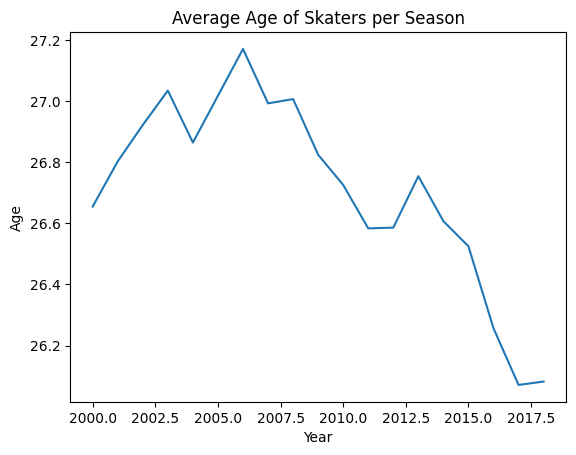

In [ ]:
#Aggregating the mean based on season and age
skaterAgeMean = nhlSkaters.groupby('Year')['Age'].mean()

#Graphing the mean age of nhl players
skaterAgeMean.plot.line(
    title='Average Age of Skaters per Season',
    xlabel='Year',
    ylabel='Age'
)

<AxesSubplot:title={'center':'Average Salary of NHL Players per Season'}, xlabel='Year', ylabel='Salary'>

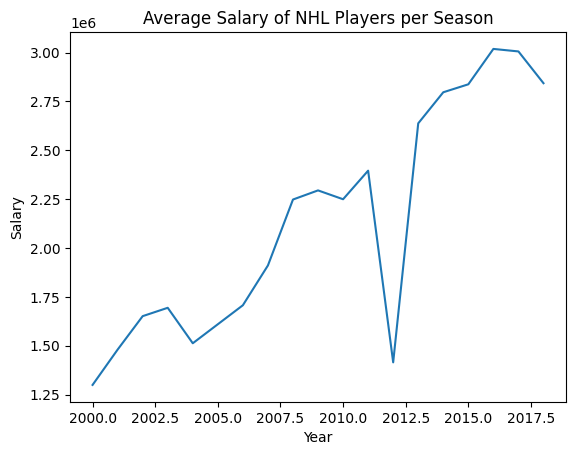

In [ ]:
#Aggregating the mean based on season and salary
nhlSalMean = nhl.groupby('Year')['Salary'].mean()

#Graphing the average salary of nhl players by season
nhlSalMean.plot.line(
    title='Average Salary of NHL Players per Season',
    xlabel='Year',
    ylabel='Salary'
)

### NFL

<AxesSubplot:title={'center':'Yards Per Int vs Games Played'}, xlabel='Games Played', ylabel='Yards Per Int'>

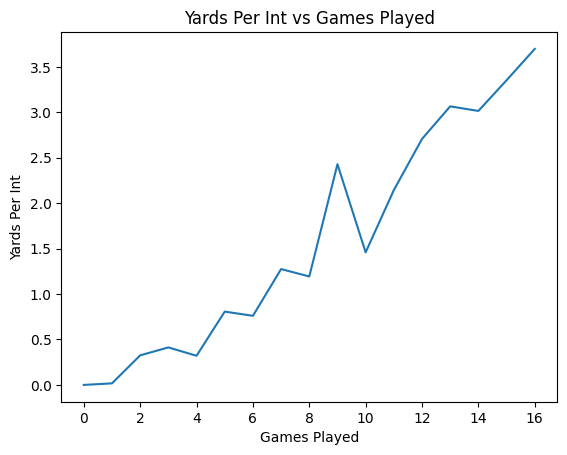

In [ ]:
#Aggregating the mean based on games played
nfl_grouped = nfl_defense.groupby('Games Played').mean()
nfl_grouped

#Graphing the aggregated data of with respect to yards covered
nfl_grouped['Yards Per Int'].plot.line(
    title='Yards Per Int vs Games Played',
    xlabel='Games Played',
    ylabel='Yards Per Int',
)

### NBA

<AxesSubplot:title={'center':'Average Salary of NBA Players per Season'}, xlabel='Season', ylabel='Salary'>

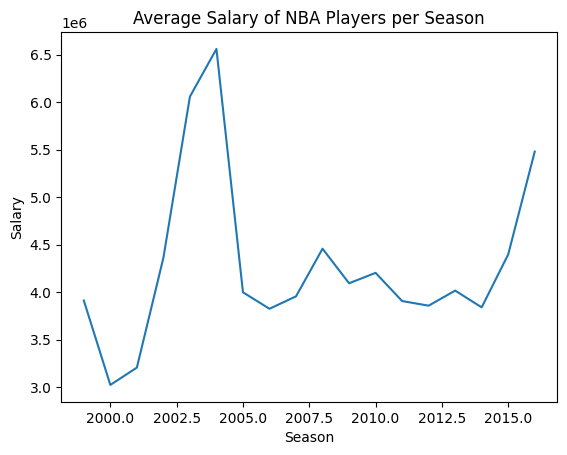

In [ ]:
#Aggregating the mean based on season and salary
nba_salEval = nba.groupby('Season')['Salary'].mean()

#Graphing the average salary of nba players by season
nba_salEval.plot.line(
    title='Average Salary of NBA Players per Season',
    xlabel='Season',
    ylabel='Salary'
)

## Data Analysis Using Machine Learning

### NHL

### NFL

### NBA